# **CNN assignment for Melanoma detection**

**Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.**

**Importing all libraries**

In [2]:
import os
import shutil
import glob
import PIL
import numpy as np
import pandas as pd
import pathlib
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt

2024-03-13 05:24:56.605658: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 05:24:56.904565: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Step 1 : Data reading and understanding**

In [3]:
# data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Assignment/Train")
# data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Assignment/Test')

data_dir_train = pathlib.Path("/home/melanoma_assignment/Train")
data_dir_test = pathlib.Path('/home/melanoma_assignment/Test')
print(data_dir_train)
print(data_dir_test)



/home/melanoma_assignment/Train
/home/melanoma_assignment/Test


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Step 2 : Dataset Creation**

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input, shear_range=0.2, zoom_range=0.2,
                                    horizontal_flip=True)
valid_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)


train_generator = train_data_gen.flow_from_directory(data_dir_train, (img_height, img_width), batch_size = batch_size,
                                                     class_mode='categorical')
valid_generator = valid_data_gen.flow_from_directory(data_dir_test, (img_height, img_width), batch_size = batch_size,
                                                     class_mode='categorical')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


**Step 3 : Data visualisation**

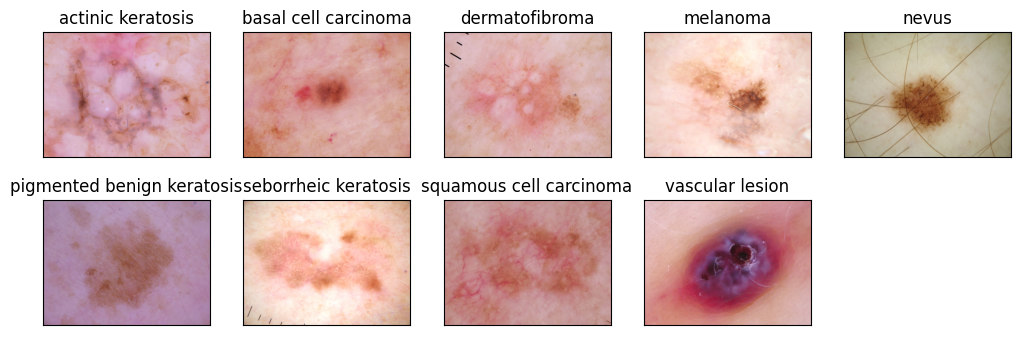

In [7]:
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis',
              'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
fig = plt.figure(figsize=(12.5, 4))
cnt = len(class_names)
for i in range(cnt):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  ax.set_title(class_names[i])

  file_path = os.path.join(data_dir_train, class_names[i], '*')
  file_path = glob.glob(file_path)
  imno = np.random.randint(len(file_path))
  image = io.imread(file_path[imno])
  plt.imshow(image)
plt.show()

**Step 4 : Model building and training**

In [8]:
num_classes = 9

def get_model():
    base_model = ResNet50(weights='imagenet', include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    base_model_output = base_model.output
    x = GlobalAveragePooling2D()(base_model_output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax', name = 'fcnew')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [9]:
model = get_model()
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  batch_size = 32,
  epochs=epochs,
  verbose = 1,
  shuffle = True
)

2024-03-13 05:25:54.266680: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 05:25:54.432462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14928 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


Epoch 1/20


2024-03-13 05:26:02.004647: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


70/70 [==============================] - 39s 508ms/step - loss: 1.7362 - accuracy: 0.3930 - val_loss: 2.0377 - val_accuracy: 0.2966
Epoch 2/20
70/70 [==============================] - 34s 484ms/step - loss: 1.2940 - accuracy: 0.5485 - val_loss: 1.5985 - val_accuracy: 0.4068
Epoch 3/20
70/70 [==============================] - 34s 480ms/step - loss: 1.1610 - accuracy: 0.6029 - val_loss: 1.7333 - val_accuracy: 0.4237
Epoch 4/20
70/70 [==============================] - 35s 493ms/step - loss: 1.0869 - accuracy: 0.6284 - val_loss: 2.0385 - val_accuracy: 0.4068
Epoch 5/20
70/70 [==============================] - 35s 499ms/step - loss: 1.0284 - accuracy: 0.6297 - val_loss: 1.7718 - val_accuracy: 0.4322
Epoch 6/20
70/70 [==============================] - 35s 496ms/step - loss: 0.9894 - accuracy: 0.6579 - val_loss: 1.6801 - val_accuracy: 0.4407
Epoch 7/20
70/70 [==============================] - 34s 482ms/step - loss: 0.9383 - accuracy: 0.6731 - val_loss: 2.0244 - val_accuracy: 0.4322
Epoch 8/20

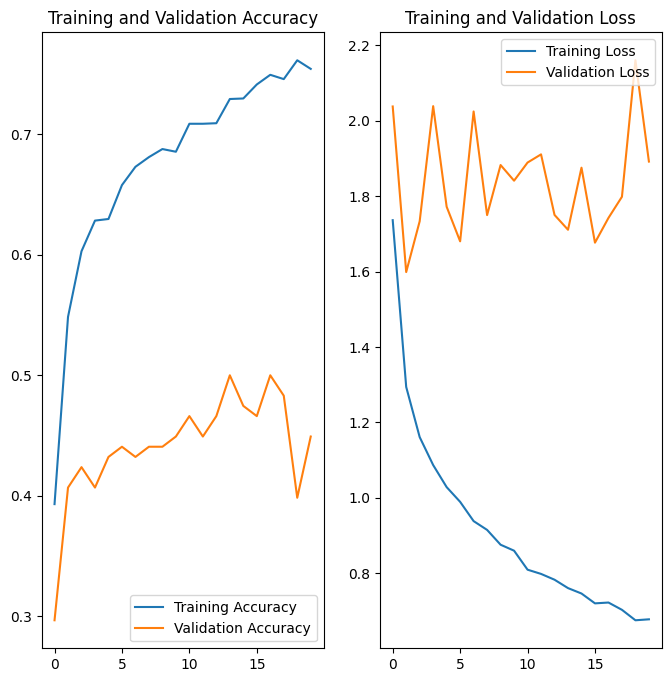

In [10]:
# Visualising training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**After the model fit, model is overfit**

**Step 5 : Data Augmentation**

In [12]:
!pip install Augmentor

  Using cached Augmentor-0.2.12-py2.py3-none-any.whl (38 kB)


In [13]:
path_to_training_dataset="/home/melanoma_assignment/Train/"
import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /home/melanoma_assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCAA3ECADF0>: 100%|██████████| 500/500 [00:02<00:00, 173.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /home/melanoma_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCAA3F93EE0>: 100%|██████████| 500/500 [00:02<00:00, 183.62 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /home/melanoma_assignment/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCAA3F087F0>: 100%|██████████| 500/500 [00:02<00:00, 174.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /home/melanoma_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC9E6EC9970>: 100%|██████████| 500/500 [00:13<00:00, 38.24 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to /home/melanoma_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC9E63AA580>: 100%|██████████| 500/500 [00:12<00:00, 41.19 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /home/melanoma_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9E6E2F310>: 100%|██████████| 500/500 [00:02<00:00, 176.63 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /home/melanoma_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC9E6E441C0>: 100%|██████████| 500/500 [00:06<00:00, 81.92 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to /home/melanoma_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9E6E3D160>: 100%|██████████| 500/500 [00:02<00:00, 178.76 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /home/melanoma_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9E7027B50>: 100%|██████████| 500/500 [00:02<00:00, 179.07 Samples/s]                  


**Step 6 : Model building and training**

In [15]:
epochs = 20
split_at = 100

model = get_model()

for layer in model.layers[:split_at]: layers.trainable = False
for layer in model.layers[split_at:]: layers.trainable = True

sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
history = model.fit(train_generator,
          validation_data=valid_generator,
          batch_size = 32,
          epochs=epochs,
          verbose = 1,
          shuffle = True)

Epoch 1/10
70/70 [==============================] - 41s 543ms/step - loss: 1.6290 - accuracy: 0.4283 - val_loss: 1.9193 - val_accuracy: 0.3898
Epoch 2/10
70/70 [==============================] - 36s 505ms/step - loss: 1.2217 - accuracy: 0.5994 - val_loss: 1.8116 - val_accuracy: 0.4407
Epoch 3/10
70/70 [==============================] - 36s 506ms/step - loss: 1.0966 - accuracy: 0.6208 - val_loss: 1.9248 - val_accuracy: 0.4322
Epoch 4/10
70/70 [==============================] - 36s 513ms/step - loss: 1.0220 - accuracy: 0.6525 - val_loss: 1.7026 - val_accuracy: 0.4492
Epoch 5/10
70/70 [==============================] - 35s 501ms/step - loss: 0.9380 - accuracy: 0.6798 - val_loss: 1.5937 - val_accuracy: 0.4746
Epoch 7/10
70/70 [==============================] - 37s 523ms/step - loss: 0.8958 - accuracy: 0.6954 - val_loss: 1.9508 - val_accuracy: 0.4407
Epoch 8/10
70/70 [==============================] - 36s 511ms/step - loss: 0.8595 - accuracy: 0.7101 - val_loss: 2.0401 - val_accuracy: 0.4492

##### After model fit, Model is overfit

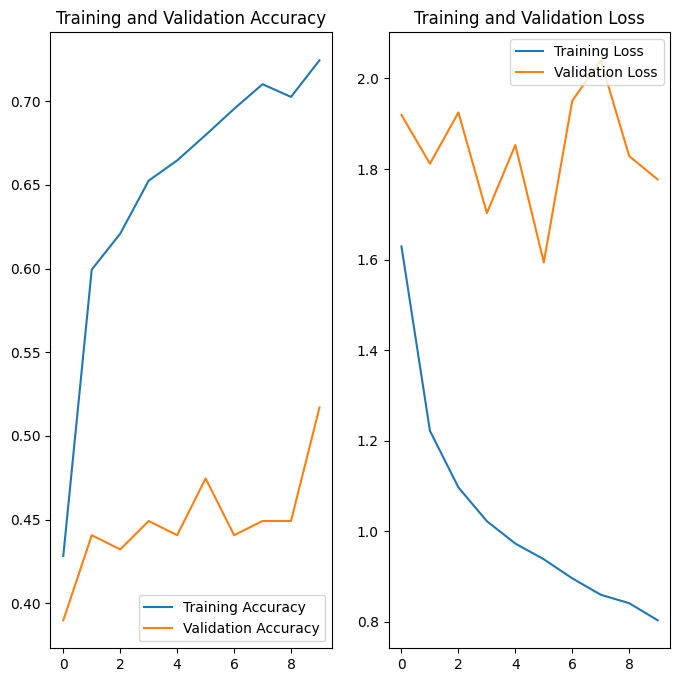

In [16]:
# Visualising training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Step 7 : Class distribution**

In [17]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_9f302a44-e4da-458f-b819-d03406b9e47f.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031335.jpg_023def23-ece3-49e8-8e65-b08abbfc28aa.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_5ccb4593-eafa-4645-ad97-7503f511ac0d.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032854.jpg_2dd69162-d5ad-428f-b791-784967311f8f.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030242.jpg_8cdfa850-52d8-4edb-8b05-ad9b35e9cee6.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_b64b3816-be2a-4987-b027-296404816080.jpg',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030877.jpg_c0025c8c-02d1-4f5c-96

In [18]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [19]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_9f302a44-e4da-458f-b819-d03406b9e47f.jpg': 'actinic keratosis',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031335.jpg_023def23-ece3-49e8-8e65-b08abbfc28aa.jpg': 'actinic keratosis',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_5ccb4593-eafa-4645-ad97-7503f511ac0d.jpg': 'actinic keratosis',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032854.jpg_2dd69162-d5ad-428f-b791-784967311f8f.jpg': 'actinic keratosis',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030242.jpg_8cdfa850-52d8-4edb-8b05-ad9b35e9cee6.jpg': 'actinic keratosis',
 '/home/melanoma_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_b64b3816-be2a-4987-b027-296404816080.jpg': 'actinic keratosis'

In [20]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,/home/melanoma_assignment/Train/actinic kerato...,actinic keratosis
1,/home/melanoma_assignment/Train/actinic kerato...,actinic keratosis
2,/home/melanoma_assignment/Train/actinic kerato...,actinic keratosis
3,/home/melanoma_assignment/Train/actinic kerato...,actinic keratosis
4,/home/melanoma_assignment/Train/actinic kerato...,actinic keratosis
...,...,...
4495,/home/melanoma_assignment/Train/vascular lesio...,vascular lesion
4496,/home/melanoma_assignment/Train/vascular lesio...,vascular lesion
4497,/home/melanoma_assignment/Train/vascular lesio...,vascular lesion
4498,/home/melanoma_assignment/Train/vascular lesio...,vascular lesion


**Step 8 : Handling class imbalance**

In [22]:
for i in class_names:
  src_dir = os.path.join(path_to_training_dataset + i, 'output')
  des_dir = os.path.join(path_to_training_dataset + i)

  for jpgfile in glob.glob(os.path.join(src_dir, '*.jpg')):
    shutil.copy(jpgfile, des_dir)
    os.unlink(jpgfile)
  os.rmdir(src_dir)

In [23]:
# Train test data generator

train_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input, shear_range=0.2, zoom_range=0.2,
                                    horizontal_flip=True)
valid_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input, shear_range=0.2, zoom_range=0.2,
                                    horizontal_flip=True)


train_generator = train_data_gen.flow_from_directory(data_dir_train, (img_height, img_width), batch_size = batch_size,
                                                     class_mode='categorical')
valid_generator = valid_data_gen.flow_from_directory(data_dir_test, (img_height, img_width), batch_size = batch_size,
                                                     class_mode='categorical')

Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


**Step 9 : Model building and training**

In [25]:
epochs = 20
split_at = 120

model = get_model()

for layer in model.layers[:split_at]: layers.trainable = False
for layer in model.layers[split_at:]: layers.trainable = True

sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
history = model.fit(train_generator,
                      validation_data=valid_generator,
                      batch_size = 32,
                      epochs=epochs,
                      verbose = 1,
                      shuffle = True)

Epoch 1/20
211/211 [==============================] - 82s 377ms/step - loss: 1.3847 - accuracy: 0.5036 - val_loss: 1.5310 - val_accuracy: 0.4407
Epoch 2/20
211/211 [==============================] - 76s 359ms/step - loss: 0.9997 - accuracy: 0.6385 - val_loss: 1.5087 - val_accuracy: 0.5000
Epoch 3/20
211/211 [==============================] - 75s 357ms/step - loss: 0.8770 - accuracy: 0.6804 - val_loss: 1.4878 - val_accuracy: 0.5000
Epoch 4/20
211/211 [==============================] - 76s 358ms/step - loss: 0.7891 - accuracy: 0.7158 - val_loss: 1.5907 - val_accuracy: 0.5000
Epoch 5/20
211/211 [==============================] - 76s 360ms/step - loss: 0.7306 - accuracy: 0.7357 - val_loss: 1.5132 - val_accuracy: 0.5254
Epoch 6/20
211/211 [==============================] - 75s 357ms/step - loss: 0.6840 - accuracy: 0.7558 - val_loss: 1.6888 - val_accuracy: 0.4661
Epoch 7/20
211/211 [==============================] - 76s 360ms/step - loss: 0.6511 - accuracy: 0.7670 - val_loss: 1.6621 - val_ac

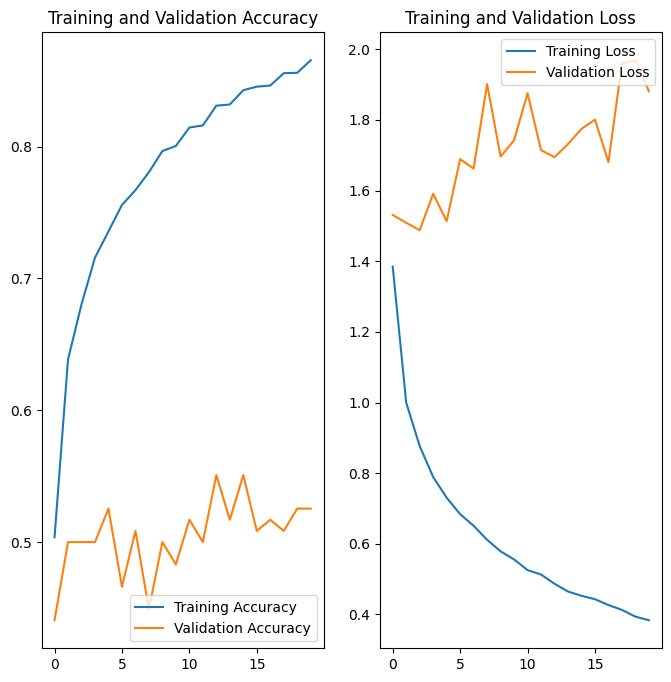

In [26]:
# Visualising training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()